# AgBr and AgI titrated with Cl


In [12]:
% setup environment
% set path to equilibrium solver
txt=pwd;
n=length(txt);
rootpath=txt; rootpath=txt(1:n-15);
PHREEQCpath=[rootpath,'/runPHREEQC'];
addpath(PHREEQCpath);
JEQUILIBpath=[rootpath,'/JEQUILIB'];
addpath(JEQUILIBpath);
% clear data and number format
clear; format short e
% turn off warnings
warning off
%graphics_toolkit ("notebook"); 
graphics_toolkit ("plotly"); 
%graphics_toolkit("gnuplot")
%available_graphics_toolkits()
%loaded_graphics_toolkits

In [13]:

AgT=1e-6; BrT=1e-5; IT=1e-5; pH=7; pe=20.75-pH; logClT=-6:1:-1; ClT=10.^logClT;
%AgT=1e-6; ClT=1e-5; IT=1e-5; pH=7; pe=20.75-pH; logBrT=-6:1:-1; BrT=10.^logBrT;

In [14]:
% MODEL USING PHREEQC

for i=1:length(ClT)

minerals=[{'AgBrs'};{'AgCls'};{'AgIs'}]; totalvector=[AgT; BrT; ClT(i); IT; ClT(i)+BrT+IT]; totalnames=[{'Ag'}; {'Br'}; {'Cl'}; {'I'}; {'Na'}]; 
speciesexport=[{'Ag+'};{'Br-'};{'Cl-'};{'I-'};{'AgBr'};{'AgBr2-'};{'AgBr3-2'};{'AgBr4-3'};{'AgCl'};{'AgCl2-'};{'AgCl3-2'};{'AgCl4-3'};{'AgI'};{'AgI2-'};{'AgI3-2'};{'AgI4-3'}];
acid=['NaOH']; show=1; T=25;
database=['complexAgClBrIs.dat']; 

tic
[solutionspeciesconcs, speciesnames, solidconcs, solidnames]=runPHREEQCv2noHA(T,pH,pe,totalnames,totalvector,minerals,speciesexport,database,show,acid);
PHREEQCtime=toc;

AgPHREEQC(i)=solutionspeciesconcs(1); 
BrPHREEQC(i)=solutionspeciesconcs(2); 
ClPHREEQC(i)=solutionspeciesconcs(3);
IPHREEQC(i)=solutionspeciesconcs(4);
AgBrPHREEQC(i)=solutionspeciesconcs(5); 
AgBr2PHREEQC(i)=solutionspeciesconcs(6);
AgBr3PHREEQC(i)=solutionspeciesconcs(7);
AgBr4PHREEQC(i)=solutionspeciesconcs(8);
AgClPHREEQC(i)=solutionspeciesconcs(9);
AgCl2PHREEQC(i)=solutionspeciesconcs(10);
AgCl3PHREEQC(i)=solutionspeciesconcs(11);
AgCl4PHREEQC(i)=solutionspeciesconcs(12);
AgIPHREEQC(i)=solutionspeciesconcs(13);
AgI2PHREEQC(i)=solutionspeciesconcs(14);
AgI3PHREEQC(i)=solutionspeciesconcs(15);
AgI4PHREEQC(i)=solutionspeciesconcs(16);
AgBrsPHREEQC(i)=solidconcs(1);
AgClsPHREEQC(i)=solidconcs(2);
AgIsPHREEQC(i)=solidconcs(3);

end

Execution exception: 'Br' undefined near line 2, column 25

Execution exception: 'h' undefined near line 1, column 8

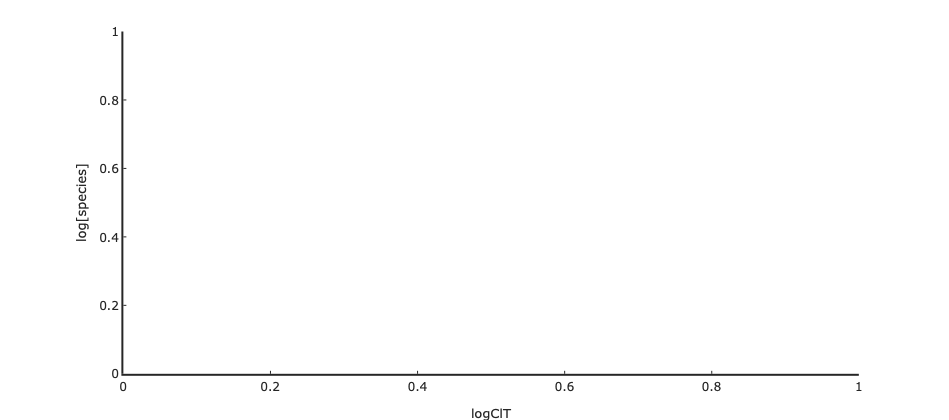

In [15]:
%h=plot(log10(ClT),log10(Ag),log10(ClT),log10(AgCls),log10(ClT),log10(AgCl),log10(ClT),log10(AgCl2),log10(ClT),log10(AgCl3),log10(ClT),log10(AgCl4));
h=plot(log10(ClT),log10(Br));
%h=plot(logBrT,log10(I));

set(h,'linewidth',2);
set(gca,'linewidth',2,'fontsize',12);
xlabel('logClT'); ylabel('log[species]');
%legend('Ag','Br','location','eastoutside')
%axis([-12 0 -40 -1])
%exportforplot=[...
%log10(Ag)' log10(Cl)' log10(AgCls)' log10(AgCl)' log10(AgCl2)' log10(AgCl3)' log10(AgCl4)'
%]

